In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [70]:
df1 = pd.read_csv("times.csv",names=['N','Time'])
df2 = pd.DataFrame()

for N in range(2,11):
    df_tmp      = pd.read_csv(f"../data/mf_kmc_comparsion/Nx={N}_Ny={N}_Nz=1_Ne=4.csv")
    df_tmp["N"] = N
    df_tmp      = df_tmp[["N","Jumps"]]
    df2         = pd.concat([df2, df_tmp],ignore_index=True)

In [71]:
df          = pd.DataFrame()
df["N"]     = np.arange(2,11)
df["J"]     = 2*df["N"]*2*(df["N"]-1) + 8
times       = []
jumps       = []

for N in range(2,11):

    times.append(df1.loc[df1["N"]==N,"Time"].sum())
    jumps.append(df2.loc[df2["N"]==N,"Jumps"].sum())

df["Time"]  = np.array(times)*10**6
df["SimD"]  = df["Time"]/(100*10**6)
df["Jumps"] = jumps
df['T/J']   = df["Time"]/df["Jumps"]
df

,N,J,Time,SimD,Jumps,T/J
0,2,16,4.361359e+07,0.436136,36643231.0,1.190222
1,3,32,3.300516e+07,0.330052,38502457.0,0.857222
2,4,56,5.075131e+07,0.507513,35507594.0,1.429309
3,5,88,8.127346e+07,0.812735,39869687.0,2.038477
4,6,128,1.601030e+08,1.601030,64527168.0,2.481172
5,7,176,2.807032e+08,2.807032,80371235.0,3.492583
6,8,232,9.169194e+08,9.169194,179035768.0,5.121431
7,9,296,1.620147e+09,16.201467,251429735.0,6.443736
8,10,368,2.393106e+09,23.931056,338618224.0,7.067268


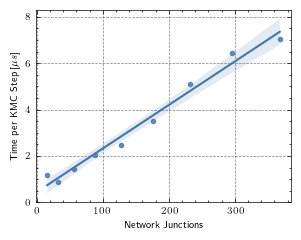

In [72]:
with plt.style.context(["science","nature","bright","grid"]):
    fig, ax = plt.subplots()
    ax      = sns.regplot(data=df, x='J', y='T/J',ax=ax)
    ax.set_xlabel("Network Junctions")
    ax.set_ylabel("Time per KMC Step [$\mu s$]")
    fig.savefig("time_per_kmc_step.pdf", transparent=False, bbox_inches='tight')
    fig.savefig("time_per_kmc_step.svg", transparent=True, bbox_inches='tight')

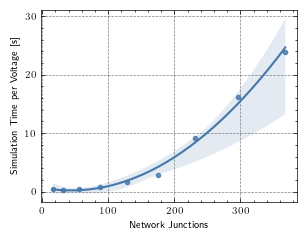

In [73]:
with plt.style.context(["science","nature","bright","grid"]):
    fig, ax = plt.subplots()
    ax      = sns.regplot(data=df, x='J', y='SimD',ax=ax, order=2)
    ax.set_xlabel("Network Junctions")
    ax.set_ylabel("Simulation Time per Voltage [s]")
    fig.savefig("sim_time.pdf", transparent=False, bbox_inches='tight')
    fig.savefig("sim_time.svg", transparent=True, bbox_inches='tight')